In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
#normalization: original input range: 0-255 / new input range: 0-1
x_train_norm = x_train.astype('float32')/255
x_test_norm = x_test.astype('float32')/255

In [5]:
x_train[0].shape

(28, 28)

In [6]:
nb_classes = 10

In [7]:
my_model = tf.keras.models.Sequential()
my_model.add(tf.keras.layers.LSTM(128, activation="tanh", return_sequences=True, input_shape=(None, x_train_norm.shape[2])))
my_model.add(tf.keras.layers.LSTM(128, activation="tanh"))
my_model.add(tf.keras.layers.Dense(nb_classes, activation="softmax"))
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         80384     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 213258 (833.04 KB)
Trainable params: 213258 (833.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [9]:
history = my_model.fit(x=x_train_norm,
                       y=y_train,
                       epochs=5,
                       validation_data=(x_test_norm, y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 7ms/step - loss: 0.2934 - accuracy: 0.9058 - val_loss: 0.1027 - val_accuracy: 0.9675
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0878 - accuracy: 0.9731 - val_loss: 0.0690 - val_accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0510 - val_accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0495 - val_accuracy: 0.9838


In [34]:
y_test[-9]

8

In [10]:
x_test_norm[0].shape

(28, 28)

In [40]:
test_input = np.expand_dims(x_test_norm[-9], axis=0)
test_input.shape

(1, 28, 28)

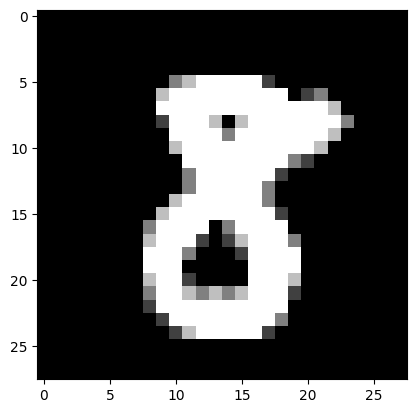

In [41]:
plt.imshow(x_test_norm[-9], cmap='gray')

In [42]:
pred = my_model.predict(test_input)
print(np.argmax(pred[0]))

1/1 [==============================] - 0s 19ms/step
8
